<a href="https://colab.research.google.com/github/mic-k3y/vidsnap.ai/blob/main/Module_10_Regression_Loss_Functions/Regression_Loss_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

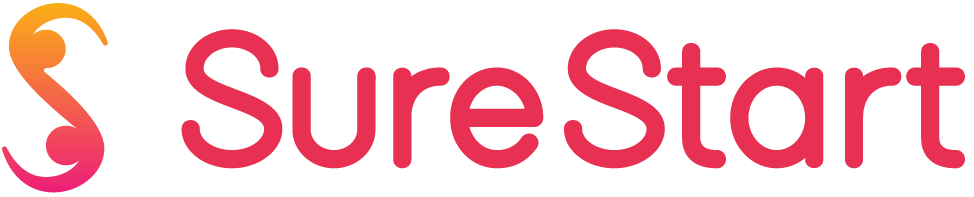

# Objective
* To introduce you to loss functions.


# Loss Functions

Loss functions define what a good prediction is and isn’t. Choosing the right loss function dictates how well your estimator (machine learning model) will be. The criteria by which an estimator is scrutinized is its performance - how accurate the model's decisions are. This calls for a way to measure how far a particular iteration of the model is from the actual values. This is where loss functions come into play.

Loss functions measure how far an estimated value is from its true value. A loss function maps decisions to their associated costs. Loss functions are not fixed, they change depending on the task in hand and the goal to be met.

Worth to note we can speak of different kind of loss functions: **regression loss** functions and **classification loss** functions.

Regression loss function describes the difference between the values that a model is predicting and the actual values of the labels. So the loss function has a meaning on a labeled data when we compare the prediction to the label at a single point of time. This loss function is often called the error function or the error formula. Typical error functions we use for regression models are L1 and L2, Huber loss, Quantile loss, log cosh loss.

**Note**: L1 loss is also know as Mean Absolute Error. L2 Loss is also know as Mean Square Error or Quadratic loss.

Loss functions for classification represent the price paid for inaccuracy of predictions in classification problems (problems of identifying which category a particular observation belongs to). To name a few: log loss, focal loss, exponential loss, hinge loss, relative entropy loss and other.

*Note*: While more commonly used in regression, the square loss function can be re-written and utilized for classification.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Regression Losses

Remember, in regression, the output would be a real value. We need some loss functions which compares two real values.

In [2]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

57026/57026 [==============================] - 0s 0us/step


## Mean Squared Error [MSE]

As the name suggests, Mean square error is measured as the average of squared difference between predictions and actual observations. It’s only concerned with the average magnitude of error irrespective of their direction.

However, due to squaring, predictions which are far away from actual values are penalized heavily in comparison to less deviated predictions. Plus MSE has nice mathematical properties which makes it easier to calculate gradients.

Let's assume there are $n$ data samples, for $i^{th}$ sample; the actual output is $y_i$ and $\hat{y}_i$ is the estimated output from the regression model.

We first square the difference between the original and estimated output with $(y_i - \hat{y}_i)^2$. Then we take sum of the squared difference for all the samples. And finally divide it by the total count of samples, which is $n$.

$$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}$$

In [3]:
model = keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

model.fit(train_features, train_labels, epochs=250, validation_split = 0.1)

Epoch 1/250
12/12 [==============================] - 6s 20ms/step - loss: 561.0848 - mse: 561.0848 - val_loss: 459.5864 - val_mse: 459.5864
Epoch 2/250
12/12 [==============================] - 0s 5ms/step - loss: 532.8552 - mse: 532.8552 - val_loss: 429.8188 - val_mse: 429.8188
Epoch 3/250
12/12 [==============================] - 0s 6ms/step - loss: 496.7243 - mse: 496.7243 - val_loss: 391.0059 - val_mse: 391.0059
Epoch 4/250
12/12 [==============================] - 0s 5ms/step - loss: 447.4283 - mse: 447.4283 - val_loss: 337.8562 - val_mse: 337.8562
Epoch 5/250
12/12 [==============================] - 0s 6ms/step - loss: 380.6602 - mse: 380.6602 - val_loss: 268.8729 - val_mse: 268.8729
Epoch 6/250
12/12 [==============================] - 0s 8ms/step - loss: 299.8943 - mse: 299.8943 - val_loss: 193.5193 - val_mse: 193.5193
Epoch 7/250
12/12 [==============================] - 0s 7ms/step - loss: 217.1641 - mse: 217.1641 - val_loss: 125.6723 - val_mse: 125.6723
Epoch 8/250
12/12 [=======

## Question 1

Now that you know how MSE works, you need to plot the behavior of **square** component of MSE loss for the synthetic errors given.

### Answer 1

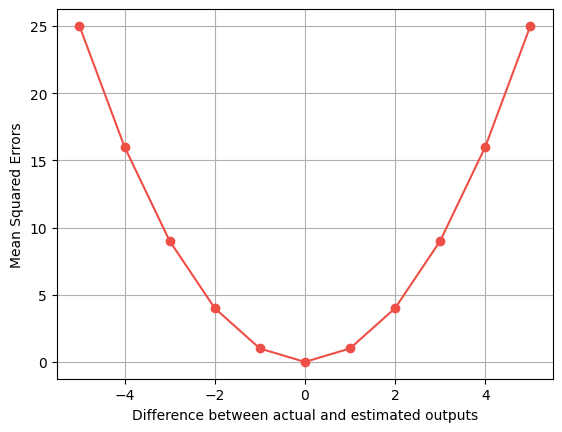

In [4]:
errors = np.arange(-5, 6)
n = len(errors)

def mse():
    return errors**2

plt.plot(errors, mse(), c='#ED4F46', marker='o')
plt.grid()
plt.xlabel('Difference between actual and estimated outputs')
plt.ylabel('Mean Squared Errors')
plt.show()


## Mean Absolute Error [MAE]

Mean absolute error, on the other hand, is measured as the average of sum of absolute differences between predictions and actual observations.

Like MSE, this as well measures the magnitude of error without considering their direction.

Unlike MSE, MAE needs more complicated tools such as linear programming to compute the gradients. Plus MAE is more robust to outliers since it does not make use of square.

Let's assume there are $n$ data samples, for $i^{th}$ sample; the actual output is $y_i$ and $\hat{y}_i$ is the estimated output from the regression model.

We first take the absolute difference between the original and estimated output with $|y_i - \hat{y}_i|2$. Then we take sum of the absolute differences for all the samples. And finally divide it by the total count of samples, which is $n$.

$$MSE = \frac{\sum_{i=1}^{n}|y_i - \hat{y}_i|}{n}$$

In [5]:
model = keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae'])

model.fit(train_features, train_labels, epochs=250, validation_split = 0.1)

Epoch 1/250
12/12 [==============================] - 2s 20ms/step - loss: 22.3660 - mae: 22.3660 - val_loss: 20.8227 - val_mae: 20.8227
Epoch 2/250
12/12 [==============================] - 0s 7ms/step - loss: 21.2599 - mae: 21.2599 - val_loss: 19.4359 - val_mae: 19.4359
Epoch 3/250
12/12 [==============================] - 0s 7ms/step - loss: 19.3139 - mae: 19.3139 - val_loss: 16.6716 - val_mae: 16.6716
Epoch 4/250
12/12 [==============================] - 0s 6ms/step - loss: 15.7259 - mae: 15.7259 - val_loss: 11.9288 - val_mae: 11.9288
Epoch 5/250
12/12 [==============================] - 0s 6ms/step - loss: 10.2925 - mae: 10.2925 - val_loss: 6.7410 - val_mae: 6.7410
Epoch 6/250
12/12 [==============================] - 0s 5ms/step - loss: 7.0870 - mae: 7.0870 - val_loss: 5.8127 - val_mae: 5.8127
Epoch 7/250
12/12 [==============================] - 0s 5ms/step - loss: 5.9004 - mae: 5.9004 - val_loss: 4.1169 - val_mae: 4.1169
Epoch 8/250
12/12 [==============================] - 0s 6ms/step

## Question 2

Now that you know how MAE works, you need to plot the behavior of the **absolute** component of MAE for the synthetic errors given.

### Answer 2

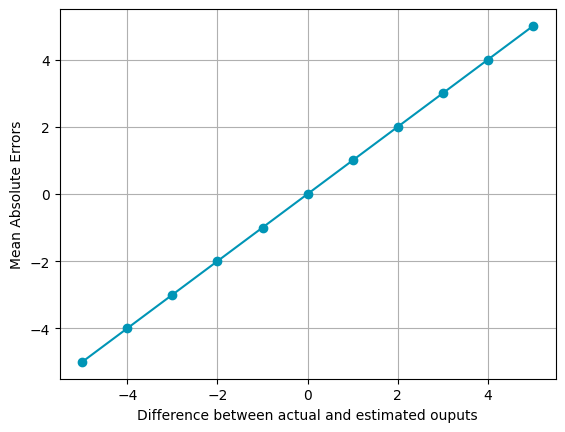

In [6]:
errors = np.arange(-5, 6)
n = len(errors)

mae = errors

plt.plot(errors, mae, c='#0095B6', marker='o')
plt.grid()
plt.xlabel('Difference between actual and estimated ouputs')
plt.ylabel('Mean Absolute Errors')
plt.show()

## Mean Squared Logarithmic Error [MSLE]

MSLE is just like MSE, but we have to take $log$ of the actual and estimated outputs because squaring and averaging.

The introduction of the logarithm makes MSLE only care about the relative difference between the true and the predicted value, or in other words, it only cares about the percentual difference between them.

This means that MSLE will treat small differences between small true and predicted values approximately the same as big differences between large true and predicted values.

We can use MSLE when we don't want large errors to be significantly more penalized than small ones, in those cases where the range of the target value is large.

*Example*: You want to predict future house prices, and your dataset includes homes that are orders of magnitude different in price. The price is a continuous value, and therefore, we want to do regression. MSLE can here be used as the loss function.

$$MSLE = \frac{\sum_{i=1}^{n}(\log(y_i+1) - \log(\hat{y}_i+1))^2}{n}$$

In [7]:
model = keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredLogarithmicError(),
              metrics=['mean_squared_logarithmic_error'])

model.fit(train_features, train_labels, epochs=150, validation_split = 0.1)

Epoch 1/150
12/12 [==============================] - 3s 29ms/step - loss: 9.0390 - mean_squared_logarithmic_error: 9.0390 - val_loss: 7.3329 - val_mean_squared_logarithmic_error: 7.3329
Epoch 2/150
12/12 [==============================] - 0s 6ms/step - loss: 6.2557 - mean_squared_logarithmic_error: 6.2557 - val_loss: 4.3990 - val_mean_squared_logarithmic_error: 4.3990
Epoch 3/150
12/12 [==============================] - 0s 5ms/step - loss: 3.7745 - mean_squared_logarithmic_error: 3.7745 - val_loss: 2.6476 - val_mean_squared_logarithmic_error: 2.6476
Epoch 4/150
12/12 [==============================] - 0s 6ms/step - loss: 2.2728 - mean_squared_logarithmic_error: 2.2728 - val_loss: 1.5578 - val_mean_squared_logarithmic_error: 1.5578
Epoch 5/150
12/12 [==============================] - 0s 7ms/step - loss: 1.3590 - mean_squared_logarithmic_error: 1.3590 - val_loss: 0.9078 - val_mean_squared_logarithmic_error: 0.9078
Epoch 6/150
12/12 [==============================] - 0s 6ms/step - loss: 0

## Question 3

Now that you know how MSLE works, you need to plot the behavior of **squared log** component of MSLE for the synthetic errors given.

### Answer 3

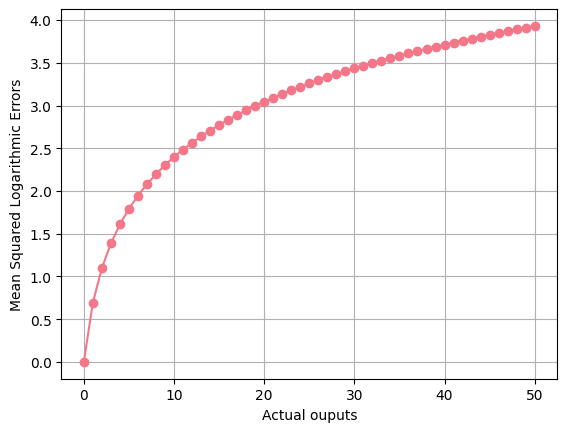

In [8]:
actual_outputs = np.arange(0, 51)
n = len(actual_outputs)
estimated_outputs = np.zeros(n)

msle = np.log1p(actual_outputs) - np.log1p(estimated_outputs)

plt.plot(actual_outputs, msle, c='#F47789', marker='o')
plt.grid()
plt.xlabel('Actual ouputs')
plt.ylabel('Mean Squared Logarithmic Errors')
plt.show()

## Question 4

Why do we add $1$ to the outputs before passing it through $\log()$?



### Answer 4
It is done to avoid taking the logarithm of zero or negative values, which ensures numerical stability and avoids undefined results.

## Question 5

Write your observations about MSE, MAE, and MSLE; and compare the results achieved with all 3 loss functions.


### Answer 5

- MSE tends to produce larger error values compared to MAE and MSLE since it squares the differences.
- MAE provides a more direct measure of the average absolute error without being affected by the error magnitudes.
- And MSLE focuses on the relative differences between the values rather than their absolute magnitudes.

## Question 6

Plug-in any of the loss functions from [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/losses) docs to the `model.compile` method and see if the difference in model performance as compared to MSE, MAE, and MSLE.

In [14]:
model = keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=[len(train_features[0])]),
    tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
    tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.Huber(),
              metrics=[tf.keras.losses.Huber()])

model.fit(train_features, train_labels, epochs=250, validation_split=0.1)


Epoch 1/250
12/12 [==============================] - 2s 20ms/step - loss: 21.8111 - huber_loss: 21.7989 - val_loss: 20.3613 - val_huber_loss: 19.3331
Epoch 2/250
12/12 [==============================] - 0s 5ms/step - loss: 20.9203 - huber_loss: 20.8841 - val_loss: 19.2724 - val_huber_loss: 18.1663
Epoch 3/250
12/12 [==============================] - 0s 7ms/step - loss: 19.4802 - huber_loss: 19.5403 - val_loss: 17.2143 - val_huber_loss: 15.9565
Epoch 4/250
12/12 [==============================] - 0s 7ms/step - loss: 16.6670 - huber_loss: 16.5385 - val_loss: 13.4042 - val_huber_loss: 12.2511
Epoch 5/250
12/12 [==============================] - 0s 7ms/step - loss: 12.0234 - huber_loss: 12.0319 - val_loss: 7.8155 - val_huber_loss: 7.5886
Epoch 6/250
12/12 [==============================] - 0s 6ms/step - loss: 7.4866 - huber_loss: 7.4196 - val_loss: 5.5040 - val_huber_loss: 6.1377
Epoch 7/250
12/12 [==============================] - 0s 5ms/step - loss: 5.7435 - huber_loss: 5.7394 - val_loss

### Answer 6

I used the huber loss function. Compared to other models, this model is very similar in performance to model trained with Mean Absolute Error(MAE) loss function in terms of performance.

# Upload this Colab Notebook to your Github repository. Also add your *reflections* on today's learning in README.md

#Fun Fact

Google Translate is getting better all the time, but it's still not perfect. Translate a sentence into another language and back into English, and you might get a hilarious surprise. That's what Malinda Kathleen Reese got when she reverse Google Translated the lyrics to "Let It Go" from Disney's Frozen into Chinese, Macedonian, French, Polish, Creole, Tamil and others. It doesn't come out as utter gibberish, but as a slightly off version with a slightly different message from the original. Which makes it even funnier. Plus, Malinda can really sing.

Link to video: https://www.youtube.com/watch?v=2bVAoVlFYf0

#References

https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23

https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/mean-squared-logarithmic-error-(msle)